# Handling missing data
This document (briefly) introduces the concept, categorization, and treatment of missing data.

## Classical categories of missing data
If we know how the missing data are generated, so-called missing data mechanisms, we can take into account why data are missing in data analysis.

A particularly useful (and wide-known) framework for missingness categorizes missingness into the following three categories (Little and Rudin, 2019):

*Caveat... the category namings are... confusing*

**MCAR (missing completely at random):** how data are missing is independent with any aspect of the data

**MAR (missing at random):** how data are missing depends on **observed** quantities, so-called *predictors, or independent variables*
- e.g., a person with certain characteristics (known) may not answer certain questions on a survey, *imagine reporting salary for different socio-economic classes*
- e.g., for certain inputs, a simulation model may crash or produce nonsensical outputs

**MNAR (missing not at random):** how data are missing depends on the **unobserved** quantities
- e.g., a pollutant sensor can only detect particles that are $> 0.1\mu\mathrm{m}$  
- e.g., storm surges only occur in areas that get below the water level

Understanding the causes of missing data helps designing algorithms to handle missing data.  *However*, in reality, we often do not know the causes, or multiple causes exist in producing a data set.

**Cautionary note:** Where the data are missing matters, i.e., is a response value missing, is a predictor value missing, or do we not know what our analysis questions are yet?

## Treatment of missing data

**Starting with an example of "completing the data"**  

|                            |
|:--------------------------:|
|![gas-a](https://github.com/mosesyhc/de300-2025sp-class/blob/gh-pages/_sources/img/gas-a.png?raw=1)  |

|                            |Replace with the mean       |
|:--------------------------:|:--------------------------:|
|![gas-a](https://github.com/mosesyhc/de300-2025sp-class/blob/gh-pages/_sources/img/gas-a.png?raw=1)  |![gas-b](https://github.com/mosesyhc/de300-2025sp-class/blob/gh-pages/_sources/img/gas-b.png?raw=1)  |

|                            |Replace with the mean + noise|
|:--------------------------:|:--------------------------:|
|![gas-a](https://github.com/mosesyhc/de300-2025sp-class/blob/gh-pages/_sources/img/gas-a.png?raw=1)  |![gas-c](https://github.com/mosesyhc/de300-2025sp-class/blob/gh-pages/_sources/img/gas-c.png?raw=1)  |

|                            |Replace with the mean + noise + parameter uncertainty|
|:--------------------------:|:--------------------------:|
|![gas-a](https://github.com/mosesyhc/de300-2025sp-class/blob/gh-pages/_sources/img/gas-a.png?raw=1)  |![gas-d](https://github.com/mosesyhc/de300-2025sp-class/blob/gh-pages/_sources/img/gas-d.png?raw=1)  |

|                            |More information + replace with mean + noise|
|:--------------------------:|:--------------------------:|
|![gas-a](https://github.com/mosesyhc/de300-2025sp-class/blob/gh-pages/_sources/img/gas-a.png?raw=1)  |![gas-e](https://github.com/mosesyhc/de300-2025sp-class/blob/gh-pages/_sources/img/gas-e.png?raw=1)  |

|                            |Predictive mean matching|
|:--------------------------:|:--------------------------:|
|![gas-a](https://github.com/mosesyhc/de300-2025sp-class/blob/gh-pages/_sources/img/gas-a.png?raw=1)  |![gas-f](https://github.com/mosesyhc/de300-2025sp-class/blob/gh-pages/_sources/img/gas-f.png?raw=1)  |

**Example of missingness impacting analysis** from Daniel et al. (2012), reproducing Figure 4 in the paper:

|![mar-mnar](https://github.com/mosesyhc/de300-2025sp-class/blob/gh-pages/_sources/img/mar-mnar.png?raw=1)|
|:---:|
|Effect of missingness mechanism on data analysis.|


### General rules for treating missing data:  
- Under MCAR, focusing on complete cases or employing imputation methods tend to be sufficient.
- Under MAR, some methods are valid choices:
  - If the missingness is independent of the response *conditional* on the predictor, linear regression is still "valid".
  - Imputation methods tend to introduce biases, depending on the data analysis methods.
- Under MNAR, the missingness should be explicitly modeled.
  - e.g., censored observations in survival analysis.

## Imputation methods
We introduce a (limited) list of imputation methods in this section, using the `titanic` dataset as an example:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.precision', 3)

titanic = sns.load_dataset('titanic', cache=True, data_home='dataset/')

### Identifying missingness
We have covered some basic ways how to identify missingness in the EDA module.  Here is one other option with the help of `missingno`.

In [ ]:
# !pip install missingno  # in case you need to install the package

# visualization of available/missing data


### Removing data
We have discussed that removing data is typically not ideal, but nothing stops us from doing that...

In [ ]:
# retaining titanic dataset with complete data
titanic_agecomp = ...

In [ ]:
# comparing the correlation with / without missing data
corr = titanic.corr()
corr_agecomp = titanic_agecomp.corr()

# changes in correlation matrix with / without age missingness
corr - corr_agecomp

### Simple imputation with a constant

In [ ]:
# !pip install scikit-learn
constant_imputer =

In [ ]:
titanic_constant = titanic.copy()

# set constant, completing data

# visualize completed data


In [ ]:
titanic_median = titanic.copy()

# example with median, admitting only numeric columns

# another equivalent option

# visualize completed data
fig, ax = plt.subplots(1, 1)
sns.histplot(titanic_median['age'], binwidth=5, alpha=0.3, color='k', label='imputed w/ median')
sns.histplot(titanic['age'], binwidth=5, alpha=0.3, color='purple', label='unimputed')
ax.legend()

### Multiple imputation
Multiple imputation is a technique to generate multiple realizations of imputation values, often modeled by a probability distribution.

One method is the multiple imputation by chained equations, or MICE. `miceforest` uses LightBGM as its training algorithm for MICE.

In [2]:
!pip install miceforest

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 1.4 MB/s eta 0:00:00


In [4]:
import miceforest as mf
# miceforest requires a real matrix.
# For illustrative purposes, we only use the numerical columns.

# set up a kernel to produce `num_datasets` imputed datasets
num_datasets = 4
kernel = mf.ImputationKernel(
    data=titanic.select_dtypes('number'),
    num_datasets=num_datasets,
    save_all_iterations_data=False,
    random_state=1
)

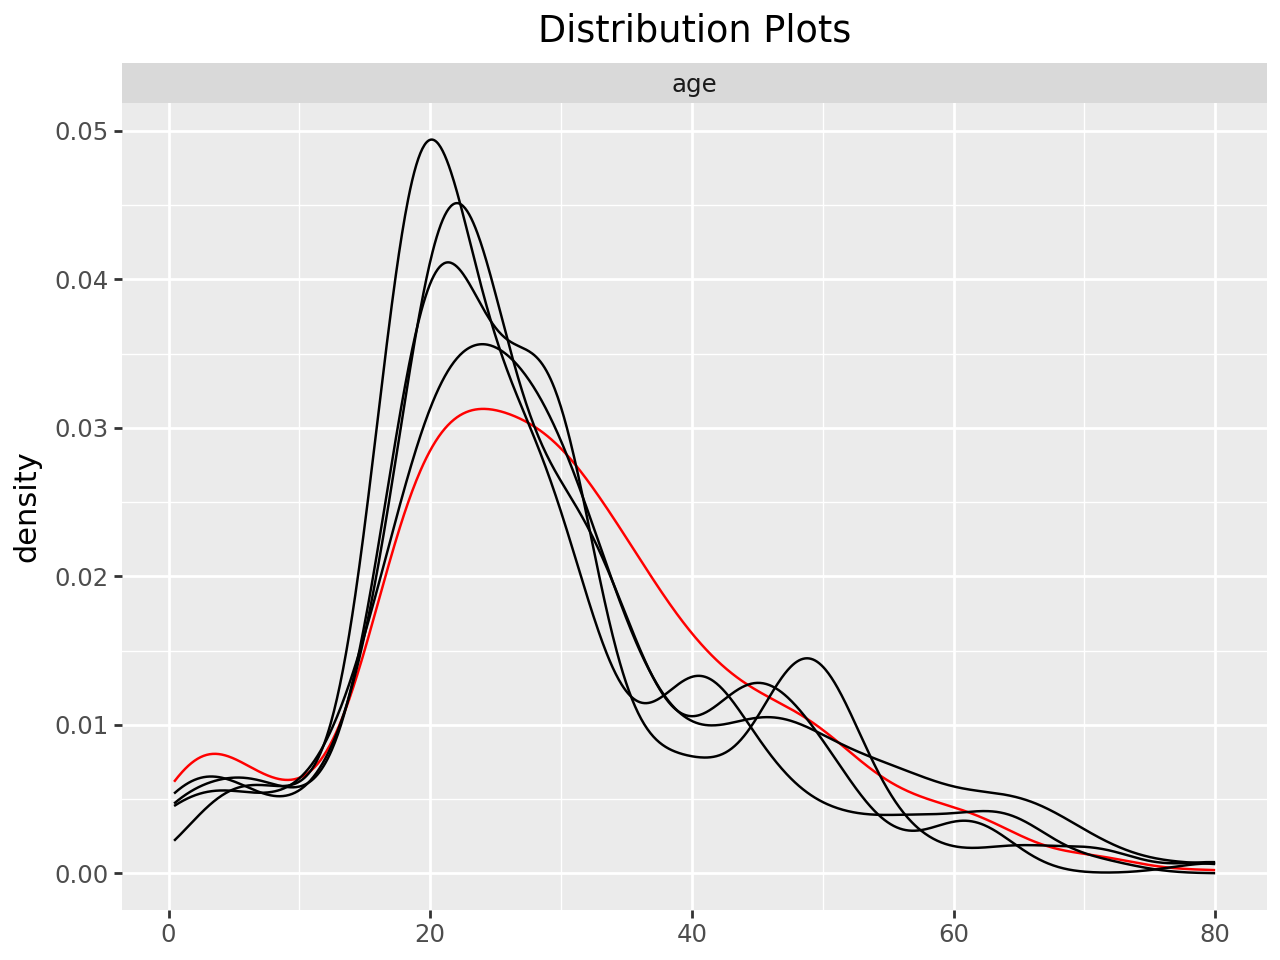

In [17]:
# run the MICE algorithm
kernel.mice(iterations=5)
kernel.plot_imputed_distributions()

In [8]:
# retrieve completed data
titanic_mf = kernel.complete_data
titanic_mf

<bound method ImputedData.complete_data of 
              Class: ImputationKernel
            Datasets: 4
          Iterations: 5
        Data Samples: 891
        Data Columns: 6
   Imputed Variables: 1
   Modeled Variables: 1
All Iterations Saved: False
        >

In [11]:
# code for plotting mice completed dataset
def plot_hist(kernel, completed_titanic, original_titanic, num_plot):
    num_datasets = kernel.num_datasets
    num_plot = min(num_datasets, num_plot)
    for k in range(num_plot):  # 1, 2, 3, num_datasets
        sns.histplot(completed_titanic(dataset=k)['age'], binwidth=5, stat='probability', color='k', label='imputed sample', alpha=0.3)

    sns.histplot(original_titanic['age'], binwidth=5, stat='probability', color='purple', label='unimputed', alpha=0.2)

    plt.title('{:d} realizations of imputed age'.format(num_plot))
    plt.legend()
    plt.tight_layout()
    plt.show()

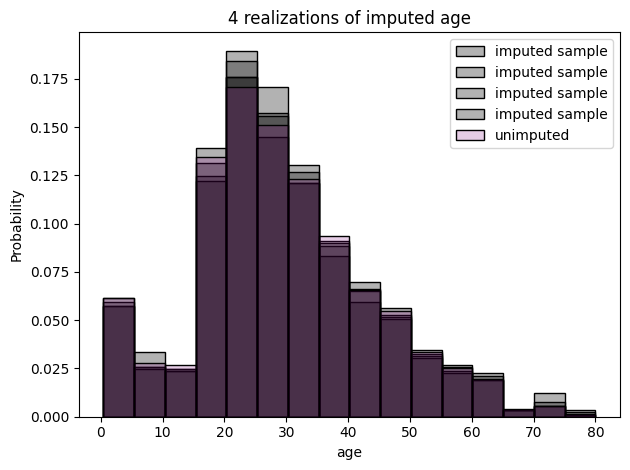

In [13]:
# retrieving each imputed dataset (recall that M in MICE means multiple)
import matplotlib.pyplot as plt

plot_hist(kernel=kernel,
          completed_titanic=titanic_mf,
          original_titanic=titanic,
          num_plot=4)

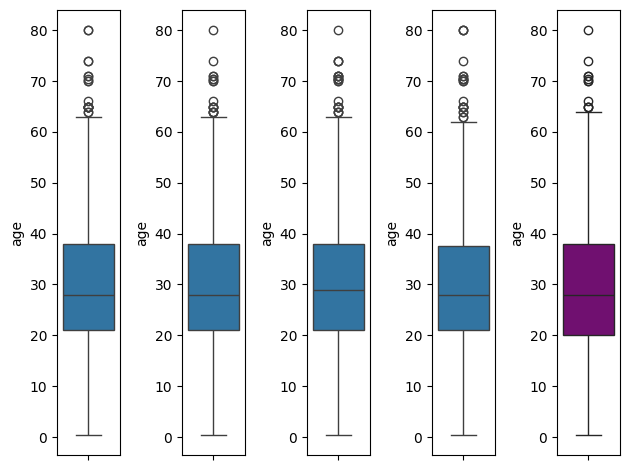

In [14]:
# comparing the original and imputed dataset
fig, ax = plt.subplots(ncols=5)

for k, axi in enumerate(ax.flatten()):
    if k < num_datasets:
        sns.boxplot(titanic_mf(dataset=k)['age'], ax=axi)
    else:
        sns.boxplot(titanic['age'], ax=axi, color='purple')

plt.tight_layout()

In [18]:
kernel_pnm = mf.ImputationKernel(
    data=titanic.select_dtypes('number'),
    num_datasets=num_datasets,
    mean_match_candidates=5,
    save_all_iterations_data=False,
    random_state=1
)

### $k$ Nearest Neighbor

In [ ]:
titanic_knn = titanic.select_dtypes('number').copy()

from sklearn.impute import KNNImputer

# set up imputing for KNN
knn_imputer = KNNImputer(n_neighbors=3)
titanic_knn_impute = knn_imputer.fit_transform(titanic_knn)

# visualize completed data
fig, ax = plt.subplots(1, 1)
sns.histplot(titanic_knn_df['age'], binwidth=5, stat='probability', alpha=0.3, color='k', label='knn imputation')
sns.histplot(titanic['age'], binwidth=5, stat='probability', alpha=0.3, color='purple', label='unimputed')
ax.legend()

### Matrix completion
Matrix completion typically assumes some low-rank structure within the dataset.  

Examples of usage:
- recommendation system (*optional* example).
- image restoration

**Alternating Least Squares**  
One particular algorithm that has garnered considerable interest is the Alternating Least Squares algorithm (Hastie et al., 2015).

Suppose we have a matrix $R \in \mathbb{R}^{n\times p}$ that contains user ratings for items.  The matrix completion or factorziation problem typically solves for some matrices $X \in \mathbb{R}^{k\times n}, Y \in \mathbb{R}^{k\times p}$ such that $R \approx X^\mathsf{T} Y$,

through the optimization problem

$$ \min_{X, Y} \ell(X, Y) := \underbrace{\frac{1}{2} \|P_\Omega(R - X^\mathsf{T} Y)\|^2_F}_\text{recovery} + \underbrace{\frac{\lambda}{2} (\|X\|^2_F + \|Y\|^2_F)}_\text{regularization}, $$

where $P_\Omega$ is a projection that fills in (or discards) missing locations.

**Observation**:  
- $\ell(X, Y)$ is non-convex.
- $\ell(X, Y)$ is bi-convex, meaning that fixing either $X$, or $Y$ leads to a convex function.

The bi-convexity leads to an alternating algorithm (for a full $R$).  But the missing locations do introduce nuances to the algorithm.  See details in Theorem 3.1 of Hastie et al. (2015).

# (Exercise) Imputation of tips

Consider the `taxis` dataset from seaborn, practice the imputation methods on the `tip` column for the dataset `subtaxi_missing`, given below:
1. Complete the data using         
    i. mean simple imputation,
    ii. median simple imputation,
    iii. k-nearest neighbor, and
    iv. predictive mean matching.
2. Compute the root mean squared error for each imputation method (because you know the truth).  Which one is the best in this case?

In [19]:
import seaborn as sns

taxi = sns.load_dataset('taxis')
taxi.info()
subtaxi = taxi.loc[:, ['passengers', 'distance', 'fare', 'tip', 'tolls', 'total']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

In [20]:
import numpy as np
# create missingness
np.random.seed(42)
mask1 = subtaxi.total*35
mask2 =

subtaxi_missing = subtaxi.copy()
subtaxi_missing.loc[mask1 & mask2, 'tip'] = np.nan

SyntaxError: invalid syntax (<ipython-input-20-e4afbcd6d0f7>, line 4)

In [ ]:
# i. mean simple imputation:
subtaxi_i = subtaxi_missing.copy()

# ii. median simple imputation:
subtaxi_ii = subtaxi_missing.copy()

# iii. k-nearest neighbor:
subtaxi_iii = subtaxi_missing.copy()

# iv. predictive mean matching:
subtaxi_iv = subtaxi_missing.copy()


In [ ]:
# Compute the root mean squared error for each imputation method (because you know the truth)

# Which one is the best in this case?

# References

- Daniel, R. M., Kenward, M. G., Cousens, S. N., & De Stavola, B. L. (2012). Using causal diagrams to guide analysis in missing data problems. Statistical methods in medical research, 21(3), 243-256.  
- Hastie, T., Mazumder, R., Lee, J. D., & Zadeh, R. (2015). Matrix completion and low-rank SVD via fast alternating least squares. The Journal of Machine Learning Research, 16(1), 3367-3402.  
- Little, R. J., & Rubin, D. B. (2019). Statistical analysis with missing data. John Wiley & Sons.  
- [Van Buuren, S. (2012). Flexible imputation of missing data. Boca Raton, FL: CRC press.](https://stefvanbuuren.name/fimd)

# Some useful additional resources

- [Gary King: Analyzing Incomplete Political Science Data](https://gking.harvard.edu/files/evil.pdf)
- Zangerle, E., & Bauer, C. (2022). Evaluating recommender systems: survey and framework. ACM Computing Surveys, 55(8), 1-38.